# Understand what PCA does

Aims of PCA:
* Reduce dimensionality (number of features)
* without wasting too much information

To understand what PCA does, we are going to illustrate it on the following simple 2D dataset.

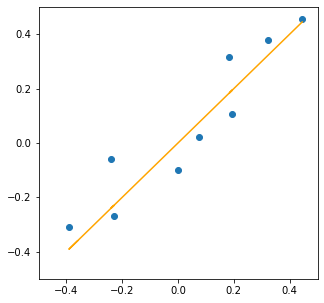

In [2]:
# Generate random 2D dataset distributed along identity line
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))
n = 10
x0 = np.arange(0, 1, 1/n)
p = np.random.normal(size=n)*1/20
y = x0 + p
x = x0 - p

# Center x and y
x = x - np.mean(x)
y = y - np.mean(y)

# Plot dataset and identity line
plt.scatter(x, y)
plt.plot(x, x, color='orange')
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

plt.show()

## Compute principal axes

sklearn provides an implementation of PCA, documented [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html):

In [3]:
# Do PCA using sklearn

from sklearn.decomposition import PCA
A = np.c_[x, y]
pca_2d = PCA()
pca_2d.fit(A)

PCA()

PCA finds "components" in the data:

In [4]:
# Plot components
pca_2d.components_

array([[-0.67022794, -0.74215531],
       [-0.74215531,  0.67022794]])

The components are vectors along which the variance of the data is maximal:

(-0.5, 0.5)

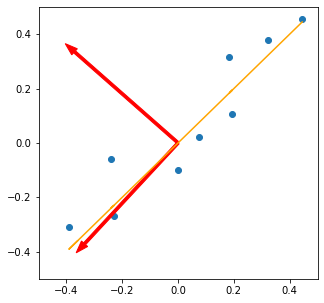

In [5]:
origin = (0, 0)
plt.figure(figsize=(5,5))

# Plot first component
plt.clf()
plt.plot(x, x, color='orange')
plt.arrow(origin[0], origin[1], pca_2d.components_[0][0]/2, pca_2d.components_[0][1]/2, width=0.01, color='red')
plt.arrow(origin[0], origin[1], pca_2d.components_[1][0]/2, pca_2d.components_[1][1]/2, width=0.01, color='red')
plt.scatter(x, y)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

Each component describes a fraction of the variance in the dataset:

In [6]:
pca_2d.explained_variance_ratio_

array([0.968806, 0.031194])

The second component explains less than 5% of the data variance, it doesn't look so useful!

The same idea can be applied to arbitrary datasets, in arbitrary dimensions!

<img src="https://upload.wikimedia.org/wikipedia/commons/9/90/PCA_fish.png" width=800/>

## Transform dataset

The principal axes define a linear transformation from the native dataset space to the orthogonal frame defined by the eigenvectors:

In [7]:
transformed_data_2d = pca_2d.fit_transform(np.c_[x, y])

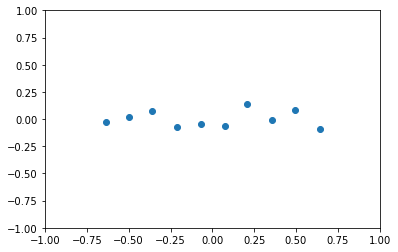

In [8]:
plt.scatter(transformed_data_2d[:,0], transformed_data_2d[:,1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

## Reduce dimensionality

Dimensionality reduction is achieved by removing (zeroing) the dimensions that explain the least amount of variance. In our simple example, the second dimension explains less than 5% of the total variance. 

We may therefore decide to drop this second dimension, which in this case reduces data dimensionality by 2 $\times$:

(-1.0, 1.0)

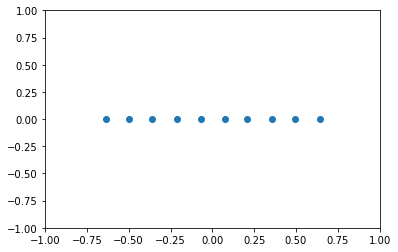

In [9]:
# Drop second dimension
reduced_data = transformed_data_2d[:,0]
plt.scatter(reduced_data, np.zeros(len(reduced_data)))
plt.xlim(-1, 1)
plt.ylim(-1, 1)

## Decorrelation


As a bonus, PCA decorrelates the features, which can help some classifiers:

In [10]:
# Original features are correlated
np.dot(A[:,0], A[:,1])

0.796299095933507

In [11]:
# Features produced by PCA are decorrelated
np.dot(transformed_data_2d[:,0], transformed_data_2d[:,1])

2.006799654482259e-17

# Apply PCA to a real dataset

Let's import a dataset from sklearn examples:

In [12]:
import pandas as pd
from sklearn.datasets import load_wine
wine_data = load_wine(as_frame=True)
wine_data = wine_data.data
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
wine_data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Usually we would like to normalize the data before applying PCA. Normalization ensures that components won't be defined by feature means.

In [14]:
wine_data_norm = wine_data.copy()
for c in wine_data_norm.columns:
    m = wine_data_norm[c].mean()
    s = wine_data_norm[c].std()
    wine_data_norm[c] = (wine_data_norm[c]-m)/s
wine_data_norm

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [15]:
wine_data_norm.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.823954e-15,2.943962e-16,-4.082876e-15,-5.488743e-17,-7.609394e-17,1.234967e-16,9.580351e-16,-1.635396e-15,-1.666270e-15,-4.216353e-16,1.657850e-15,2.200487e-15,-1.341000e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318e+00,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00
25%,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-8.829774e-01,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01
50%,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,9.568993e-02,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01
75%,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,8.067217e-01,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01
max,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372e+00,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00


## Apply PCA

Let's apply PCA:

In [16]:
pca_wine = PCA()
pca_wine.fit(wine_data_norm)
pca_wine.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

## Reduce dimensionality

There is no ultimate rule to determine the number of components to keep. Here the "elbow" rule shows that not much information is gained after the 3rd component:

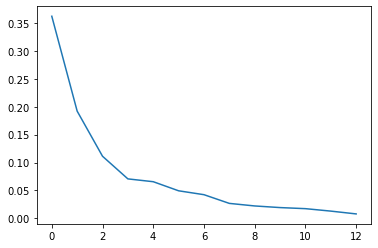

In [17]:
plt.plot(pca_wine.explained_variance_ratio_)

Keeping only 3 components removes 33% of the total variance, that's quite a lot!

In [18]:
sum(pca_wine.explained_variance_ratio_[:3])

0.6652996889318525

Another common rule is to keep enough components to retain 90% of the variance. With this dataset this rule would lead us to keep 7 components:

In [19]:
sum(pca_wine.explained_variance_ratio_[:7])

0.8933679539739376

In [20]:
ncomp = 7
pca_wine = PCA(n_components=ncomp)
wine_data_norm_pca = pd.DataFrame(pca_wine.fit_transform(wine_data_norm),
                                  columns=[f'PCA_{str(i)}' for i in range(ncomp)])
wine_data_norm_pca

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,3.307421,-1.439402,-0.165273,-0.215025,0.691093,-0.223250,0.594749
1,2.203250,0.332455,-2.020757,-0.290539,-0.256930,-0.924512,0.053624
2,2.509661,-1.028251,0.980054,0.722863,-0.250327,0.547731,0.423012
3,3.746497,-2.748618,-0.175696,0.566386,-0.310964,0.114109,-0.382259
4,1.006070,-0.867384,2.020987,-0.408613,0.297618,-0.405376,0.442825
...,...,...,...,...,...,...,...
173,-3.361043,-2.210055,-0.341606,1.055549,-0.572549,-1.105669,0.955720
174,-2.594637,-1.752286,0.206997,0.348513,0.254346,-0.026391,0.146480
175,-2.670307,-2.753133,-0.938295,0.311157,1.267779,0.272300,0.677325
176,-2.380303,-2.290884,-0.549147,-0.686348,0.811666,1.175467,0.632192


## Visualize PCA components

Visualizing the first PCA components can be interesting:

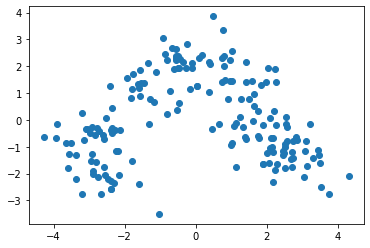

In [21]:
plt.scatter(wine_data_norm_pca['PCA_0'], wine_data_norm_pca['PCA_1'])

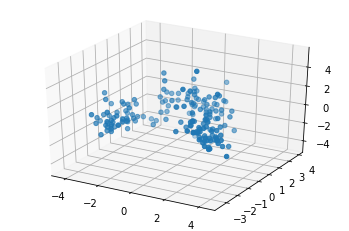

In [22]:
ax = plt.axes(projection='3d')
ax.scatter(wine_data_norm_pca['PCA_0'], wine_data_norm_pca['PCA_1'], wine_data_norm_pca['PCA_2'])

# Understand how PCA works

## Compute the principal axes

Let's consider the covariance matrix of the dataset, which for centered data is given by:

$$
C = A^TA
$$

Where
* A is the data matrix of size (n, p),
* Rows identify n data points,
* Columns identify p features.

In [23]:
# Compute the correlation matrix
C = np.dot(A.T, A)
C

array([[0.77238497, 0.7962991 ],
       [0.7962991 , 0.93501684]])

$C$ is a square matrix of size p and rank p. Therefore, it can be decomposed as follows:

$$
C = E \Lambda E^T
$$

Where:
* $\Lambda$ is a diagonal matrix containing the eigen values of $C$
* $E$ is the matrix of eigen vectors

This is obtained as follows in Numpy:

In [24]:
# Get the eigen vectors and values
from numpy.linalg import eig
eigen_vals, eigen_vects = eig(C)
eigen_vals, eigen_vects

(array([0.05326069, 1.65414112]),
 array([[-0.74215531, -0.67022794],
        [ 0.67022794, -0.74215531]]))

The eigenvalues of $C$ represent the amount of variance explained by the PCA components:

In [25]:
s = sum(eigen_vals)
explained_variance_ratio = [x/s for x in eigen_vals]
explained_variance_ratio

[0.03119400035175638, 0.9688059996482435]

In [26]:
pca_2d.explained_variance_ratio_

array([0.968806, 0.031194])

The eigenvalues of $C$ are also the squares of the singular values returned by sklearn:

In [27]:
eigen_vals

array([0.05326069, 1.65414112])

In [28]:
pca_2d.singular_values_**2

array([1.65414112, 0.05326069])

Finally the eigenvectors are the components themselves:

In [29]:
pca_2d.components_

array([[-0.67022794, -0.74215531],
       [-0.74215531,  0.67022794]])

In [30]:
eigen_vects_sorted = np.array([eigen_vects[:,i] for i in reversed(np.argsort(eigen_vals))])
eigen_vects_sorted

array([[-0.67022794, -0.74215531],
       [-0.74215531,  0.67022794]])

## Apply PCA

The matrix $E$ of eigen vectors defines a linear transformation from the native data space to the PCA space:

$$
T = A E
$$

Where T is the transformed data matrix

In [31]:
transformed = np.dot(A, eigen_vects_sorted)

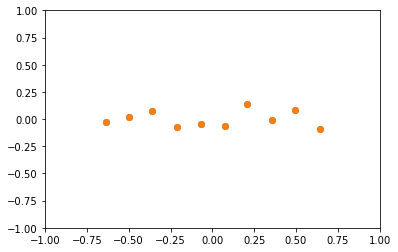

In [34]:
from matplotlib import pyplot as plt
plt.clf()
plt.scatter(transformed[:,0], transformed[:,1])  ### why - sign?
plt.scatter(transformed_data_2d[:,0], transformed_data_2d[:,1])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

# Apply PCA with Spark

In [35]:
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL basic example") \
        .getOrCreate()

In [36]:
df = spark.createDataFrame(wine_data_norm)
df.show()

+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+----------------------------+--------------------+
|            alcohol|          malic_acid|                 ash|   alcalinity_of_ash|           magnesium|      total_phenols|         flavanoids|nonflavanoid_phenols|     proanthocyanins|     color_intensity|                 hue|od280/od315_of_diluted_wines|             proline|
+-------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+----------------------------+--------------------+
| 1.5143407672921458|  -0.560668220516758| 0.23139978993797622| -1.1663031736391336|    1.90852150727848| 0.8067217293796732| 1.0319080692191864| -0.65770779947

In [37]:
from pyspark.ml.feature import PCA
pca = PCA(k=7, inputCol='features', outputCol='output')

In [38]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=list(wine_data_norm.columns), outputCol="features")

final_df = assembler.transform(df)

In [39]:
model = pca.fit(final_df)

In [40]:
model.explainedVariance

DenseVector([0.362, 0.1921, 0.1112, 0.0707, 0.0656, 0.0494, 0.0424])

In [41]:
pca_wine.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679])

In [42]:
model.transform(final_df).select('output').show(truncate=200)

+-----------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                         output|
+-----------------------------------------------------------------------------------------------------------------------------------------------+
|   [-3.3074209742892196,-1.4394022531822928,0.16527282978197488,-0.21502462886792395,0.6910933491309081,0.22325036575090662,0.5947488306815295]|
|    [-2.203249813420225,0.33245507119418033,2.0207570604794953,-0.29053874322891826,-0.2569298661710212,0.9245123057914455,0.05362434498857224]|
|     [-2.509660694761863,-1.0282507242941945,-0.9800540552552994,0.7228631990496862,-0.2503269758057909,-0.5477309633081155,0.4230121843493197]|
|     [-3.746497190498,-2.7486183908585353,0.17569622422136086,0.5663856019167703,-0.31096439791832575,-0.11410911207014074,

# Conclusion

Other approaches to dimensionality reduction
* Singular Value Decomposition (SVD): very similar to PCA
* CUR decomposition (preserves sparsity)
* tSNE
* min-hashing (for categorical variables)